In [1]:
import wfdb
import pywt
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image

In [ ]:
source_dir = './mit-bih-arrhythmia-database-1.0.0/'

dat_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.dat')]
hea_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.hea')]
print(len(dat_files))
print(len(hea_files))

In [ ]:
source_dir = './mit-bih-artial-fibrillation-database-1.0.0'

dat_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.dat')]

h = 0
d = 0

for file in os.listdir(source_dir):
    if file.endswith('.hea'):
        h = h+1
    elif file.endswith('.dat'):
        d = d+1
    else:
        pass
print(h)
print(d)

In [ ]:
source_dir = './mit-bih-artial-fibrillation-database-1.0.0'

dat_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.dat')]
hea_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.hea')]

diff_files = [file for file in hea_files if file not in dat_files]

print(diff_files)

In [ ]:
source_dir = './mit-bih-artial-fibrillation-database-1.0.0'
h,d=0,0

for file in os.listdir(source_dir):
    if file.endswith('.hea') and file[:-4] not in diff_files:
        h = h+1
    elif file.endswith('.dat'):
        d = d+1
    else:
        pass
print(h)
print(d)

In [ ]:
source_dir = './mit-bih-normal-sinus-rhythm-database-1.0.0'

dat_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.dat')]
hea_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.hea')]
print(len(dat_files))
print(len(hea_files))

In [ ]:
source_dir = './mit-bih-malignant-ventricular-ectopy-database-1.0.0'

dat_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.dat')]
hea_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.hea')]
print(len(dat_files))
print(len(hea_files))

In [ ]:
source_dir = './mit-bih-st-change-database-1.0.0'

dat_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.dat')]
hea_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.hea')]
print(len(dat_files))
print(len(hea_files))

In [ ]:
source_dir = './mit-bih-arrhythmia-database-1.0.0/'
target_dir = './arrhythmia_dat'

os.makedirs(target_dir, exist_ok=True)

for file in os.listdir(source_dir):
    if file.endswith('.dat') or file.endswith('.hea'):
        shutil.copy2(os.path.join(source_dir, file), os.path.join(target_dir, file))

In [ ]:
source_dir = './mit-bih-normal-sinus-rhythm-database-1.0.0'
target_dir = './normal_dat'

os.makedirs(target_dir, exist_ok=True)

for file in os.listdir(source_dir):
    if file.endswith('.dat') or file.endswith('.hea'):
        shutil.copy2(os.path.join(source_dir, file), os.path.join(target_dir, file))

In [ ]:
source_dir = './mit-bih-malignant-ventricular-ectopy-database-1.0.0'
target_dir = './malignant_dat'

os.makedirs(target_dir, exist_ok=True)

for file in os.listdir(source_dir):
    if file.endswith('.dat') or file.endswith('.hea'):
        shutil.copy2(os.path.join(source_dir, file), os.path.join(target_dir, file))

In [ ]:
source_dir = './mit-bih-st-change-database-1.0.0'
target_dir = './st_dat'

os.makedirs(target_dir, exist_ok=True)

for file in os.listdir(source_dir):
    if file.endswith('.dat') or file.endswith('.hea'):
        shutil.copy2(os.path.join(source_dir, file), os.path.join(target_dir, file))

In [ ]:
source_dir = './mit-bih-artial-fibrillation-database-1.0.0'
target_dir = './artial_dat'

os.makedirs(target_dir, exist_ok=True)

for file in os.listdir(source_dir):
    if file.endswith('.dat') or file.endswith('.hea') and file[:-4] not in diff_files:
        shutil.copy2(os.path.join(source_dir, file), os.path.join(target_dir, file))

In [ ]:
source_dir = './artial_dat'

dat_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.dat')]
hea_files = [file[:-4] for file in os.listdir(source_dir) if file.endswith('.hea')]
print(len(dat_files))
print(len(hea_files))

In [ ]:
arrhythmia_signals = []

# List of arrhythmic record names (e.g., MIT-BIH arrhythmia patients)
record_list = [i for i in range(100,235)]

for record_name in record_list:
    try:
        record = wfdb.rdrecord(f'./arrhythmia_dat/{record_name}')
        signal = record.p_signal[:, 0]  # Use first lead
    
        # Sampling frequency (usually 360 Hz in MIT-BIH)
        fs = record.fs
    
        # Segment the signal into 2-second windows
        window_size = 2 * fs  # e.g., 720 samples
        for start in range(0, len(signal) - window_size, window_size):
            segment = signal[start:start + window_size]
            arrhythmia_signals.append(segment)
    except FileNotFoundError as e:
        pass

In [ ]:
normal_signals = []

# List of normal record names (e.g., MIT-BIH normal patients)
record_list = [i for i in range(16265,19831)]

for record_name in record_list:
    try:
        record = wfdb.rdrecord(f'./normal_dat/{record_name}')
        signal = record.p_signal[:, 0]  # Use first lead
    
        # Sampling frequency (usually 360 Hz in MIT-BIH)
        fs = record.fs
    
        # Segment the signal into 2-second windows
        window_size = 2 * fs  # e.g., 720 samples
        for start in range(0, len(signal) - window_size, window_size):
            segment = signal[start:start + window_size]
            normal_signals.append(segment)
    except FileNotFoundError as e:
        pass
    except MemoryError as m:
        pass

In [ ]:
st_signals = []

# List of st-change record names (e.g., MIT-BIH st-change patients)
record_list = [i for i in range(250,330)]

for record_name in record_list:
    try:
        record = wfdb.rdrecord(f'./st_dat/{record_name}')
        signal = record.p_signal[:, 0]  # Use first lead
    
        # Sampling frequency (usually 360 Hz in MIT-BIH)
        fs = record.fs
    
        # Segment the signal into 2-second windows
        window_size = 2 * fs  # e.g., 720 samples
        for start in range(0, len(signal) - window_size, window_size):
            segment = signal[start:start + window_size]
            st_signals.append(segment)
    except FileNotFoundError as e:
        pass
    except MemoryError as m:
        pass

In [ ]:
artial_signals = []

# Record names as strings with leading zeros
record_list = [f"{i:05d}" for i in range(4000, 8500)]  # 04000 becomes '04000'

for record_name in record_list:
    try:
        record = wfdb.rdrecord(f'./artial_dat/{record_name}')
        signal = record.p_signal[:, 0]  # Use first lead
    
        fs = record.fs
        window_size = 2 * fs  # 2-second window
    
        for start in range(0, len(signal) - window_size, window_size):
            segment = signal[start:start + window_size]
            artial_signals.append(segment)
    except FileNotFoundError:
        pass
    except MemoryError:
        pass

In [ ]:
malignant_signals = []

# List of malignant record names (e.g., MIT-BIH malignant patients)
record_list = [i for i in range(400,620)]

for record_name in record_list:
    try:
        record = wfdb.rdrecord(f'./malignant_dat/{record_name}')
        signal = record.p_signal[:, 0]  # Use first lead
    
        # Sampling frequency (usually 360 Hz in MIT-BIH)
        fs = record.fs
    
        # Segment the signal into 2-second windows
        window_size = 2 * fs  # e.g., 720 samples
        for start in range(0, len(signal) - window_size, window_size):
            segment = signal[start:start + window_size]
            malignant_signals.append(segment)
    except FileNotFoundError as e:
        pass
    except MemoryError as m:
        pass

In [ ]:
print(len(arrhythmia_signals))
print(len(normal_signals))
print(len(malignant_signals))
print(len(artial_signals))
print(len(st_signals))

In [12]:
def generate_scalogram(signal, filename):
    scales = np.arange(1, 128)
    coef, _ = pywt.cwt(signal, scales, 'morl')
    plt.imshow(coef, cmap='jet', aspect='auto')
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:
sample_paths = [
    './arrhythmia_dat/100.dat',
    './arrhythmia_dat/124.dat',
    './normal_dat/16265.dat',
    './normal_dat/18177.dat',
    './malignant_dat/419.dat',
    './malignant_dat/612.dat',
    './artial_dat/04936.dat',
    './artial_dat/05121.dat',
    './st_dat/311.dat',
    './st_dat/324.dat',
]

In [ ]:
def load_signal(dat_path):
    record_path = dat_path[:-4]
    record = wfdb.rdrecord(record_path)
    signal = record.p_signal[:, 0]
    fs = record.fs
    return signal[:2*fs], fs  # First 2 seconds

def get_title(path):
    record_num = int(path.split('/')[-1].split('.')[0])
    if record_num < 290:
        return f"Scalogram of {path.split('/')[-1]} : Arrhythmia"
    elif 290 < record_num < 350:
        return f"Scalogram of {path.split('/')[-1]} : ST-change"
    elif 400 < record_num < 650:
        return f"Scalogram of {path.split('/')[-1]} : Malignant"
    elif 4000 < record_num < 8500:
        return f"Scalogram of {path.split('/')[-1]} : Artial-fibrillation"
    else:
        return f"Scalogram of {path.split('/')[-1]} : Normal"

def plot_scalograms_grid(sample_paths):
    num_plots = len(sample_paths)
    cols = 2
    rows = (num_plots + 1) // cols  # Ensures enough rows

    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

    # Flatten axes for easy indexing
    axes = axes.flatten()

    for i, path in enumerate(sample_paths):
        signal, fs = load_signal(path)
        widths = np.arange(1, 129)
        cwtmatr, _ = pywt.cwt(signal, widths, 'morl', sampling_period=1/fs)

        ax = axes[i]
        ax.imshow(abs(cwtmatr), extent=[0, 2, 1, 128], cmap='jet', aspect='auto',
                  vmax=abs(cwtmatr).max(), vmin=0)
        ax.set_title(get_title(path), fontsize=10)
        ax.set_ylabel('Scale')
        ax.set_xlabel('Time (s)')

    # Hide unused subplots if sample_paths is not a multiple of 2
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:
for i,path in enumerate(sample_paths):
    print(str(i) + " : " + path)

In [ ]:
plot_scalograms_grid(sample_paths[:10])  # Shows 3 rows with 2 plots per row

In [ ]:
random.shuffle(arrhythmia_signals)

In [ ]:
count = 0

for i, signal in enumerate(arrhythmia_signals):
    count = count+1
    generate_scalogram(signal, f'./cwt_images/arrhythmia/{i}.png')
    if(count == 1500): # to have small dataset
        break

In [ ]:
target_dir = './cwt_images/normal'
os.makedirs(target_dir, exist_ok=True)

random.shuffle(normal_signals)
count = 0
for i, signal in enumerate(normal_signals):
    count = count+1
    generate_scalogram(signal, f'./cwt_images/normal/{i}.png')
    if(count == 1500): # to have small dataset
        break

In [ ]:
target_dir = './cwt_images/malignant'
os.makedirs(target_dir, exist_ok=True)

# random.shuffle(normal_signals)
count = 0
for i, signal in enumerate(malignant_signals):
    count = count+1
    generate_scalogram(signal, f'./cwt_images/malignant/{i}.png')
    if(count == 1500): # to have small dataset
        break

In [ ]:
target_dir = './cwt_images/malignant_shuffled'
os.makedirs(target_dir, exist_ok=True)

list_copy = malignant_signals.copy()
random.shuffle(list_copy)
count = 0
for i, signal in enumerate(list_copy):
    count = count+1
    generate_scalogram(signal, f'./cwt_images/malignant_shuffled/{i}.png')
    if(count == 500): # to have small dataset
        break

In [ ]:
target_dir = './cwt_images/artial_shuffled'
os.makedirs(target_dir, exist_ok=True)

list_copy = artial_signals.copy()
random.shuffle(list_copy)
count = 0
for i, signal in enumerate(list_copy):
    count = count+1
    generate_scalogram(signal, f'./cwt_images/artial_shuffled/{i}.png')
    if(count == 1500): # to have small dataset
        break

In [ ]:
target_dir = './cwt_images/st_shuffled'
os.makedirs(target_dir, exist_ok=True)

list_copy = st_signals.copy()
random.shuffle(list_copy)
count = 0
for i, signal in enumerate(list_copy):
    count = count+1
    generate_scalogram(signal, f'./cwt_images/st_shuffled/{i}.png')
    if(count == 1500): # to have small dataset
        break

In [ ]:
# to verify if all the images are usable
base_folder = './cwt_images'

for category in os.listdir(base_folder):
    folder_path = os.path.join(base_folder, category)
    if not os.path.isdir(folder_path):
        continue
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        try:
            with Image.open(img_path) as img:
                img.verify()  # Just verify, no need to load full image
        except Exception as e:
            print(f"Bad image detected: {img_path} | Error: {e}")

In [ ]:
img = Image.open('./cwt_images/artial_shuffled/78.png')
# Do something with img
img.close()  # ✅ Close the file

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    './cwt_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for 3+ classes
    subset='training'
)

val_gen = datagen.flow_from_directory(
    './cwt_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5200 images belonging to 5 classes.
Found 1300 images belonging to 5 classes.


In [3]:
# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze pretrained layers

In [4]:
x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output = Dense(5, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10)
model.save('ecg_model_eg10epochs.h5')

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.6365 - loss: 1.0116 - val_accuracy: 0.8638 - val_loss: 0.4295
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.8655 - loss: 0.3969 - val_accuracy: 0.8785 - val_loss: 0.3449
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.8853 - loss: 0.3138 - val_accuracy: 0.8846 - val_loss: 0.3113
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.8878 - loss: 0.2866 - val_accuracy: 0.8892 - val_loss: 0.2970
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 413s 3s/step - accuracy: 0.8964 - loss: 0.2578 - val_accuracy: 0.8977 - val_loss: 0.2844
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 423s 3s/step - accuracy: 0.9146 - loss: 0.2329 - val_accuracy: 0.8985 - val_loss: 0.2761
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.9127 - loss: 0.2245 - val_accuracy: 0.9015 - val_loss: 0.2682
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.9252 - loss: 0.2012 - val_accu

In [6]:
loss, accuracy = model.evaluate(val_gen)
print(f"Test Accuracy: {accuracy*100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9053 - loss: 0.2354
Test Accuracy: 90.46%


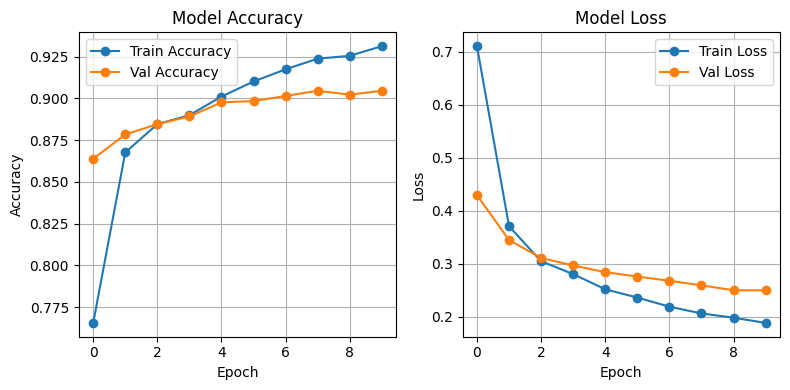

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
plt.savefig('training_curves_for_ecg_mmodel.png')

In [8]:
def load_user_signal(folder_path, record_name='sample'):
    record = wfdb.rdrecord(f"{folder_path}/{record_name}")
    signal = record.p_signal[:, 0]  # First lead
    fs = record.fs
    return signal[:2*fs], fs  # First 2 seconds

In [9]:
print(train_gen.class_indices)

{'arrhythmia': 0, 'artial_shuffled': 1, 'malignant_shuffled': 2, 'normal': 3, 'st_shuffled': 4}


In [10]:
def predict_heart_condition(model_path, img_path):
    model = load_model(model_path)
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_class = np.argmax(prediction)
    class_labels = ['arrhythmia','artial','malignant', 'normal', 'st-change']
    return class_labels[predicted_class]

In [13]:
signal, fs = load_user_signal('./user/normal','./16786')  # Assuming user_ecg.dat/.hea exists
generate_scalogram(signal, 'user_scalogram.png')
result = predict_heart_condition('ecg_model.h5', 'user_scalogram.png')
print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Prediction: normal


In [ ]:
def complete_pipeline_1(folder_path,record_name,output_path,model_path):
    signal, fs = load_user_signal(folder_path,record_name)
    generate_scalogram(signal,output_path)
    result = predict_heart_condition(model_path,output_path)
    print("Prediction:", result)

In [14]:
def complete_pipeline(folder_path, record_name, true_label):
    signal, fs = load_user_signal(folder_path, record_name)
    generate_scalogram(signal, 'user_scalogram.png')
    predicted_label = predict_heart_condition('ecg_model.h5', 'user_scalogram.png')

    # Plot signal with predicted and true label in title
    time = np.linspace(0, 2, len(signal))  # 2 seconds
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal, color='black')
    plt.title(f"Predicted: {predicted_label} | True: {true_label}", fontsize=14)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("Prediction:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


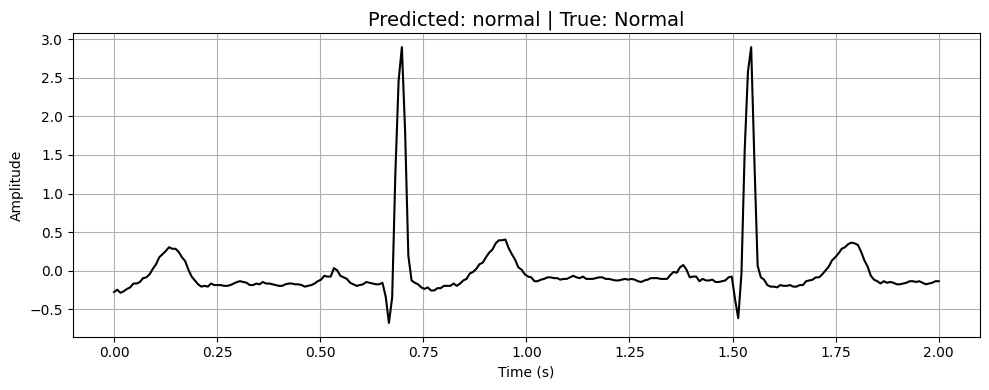

Prediction: normal


In [15]:
complete_pipeline('./user/normal','16786',true_label='Normal')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


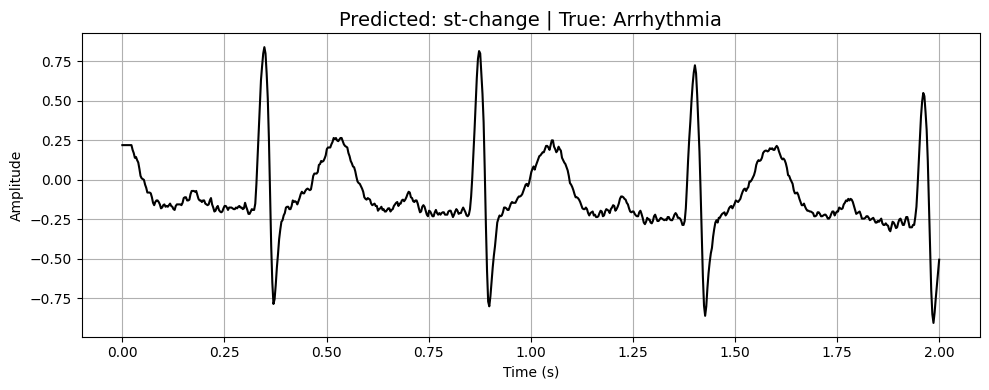

Prediction: st-change


In [16]:
complete_pipeline('./user/arrhy','215',true_label='Arrhythmia')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


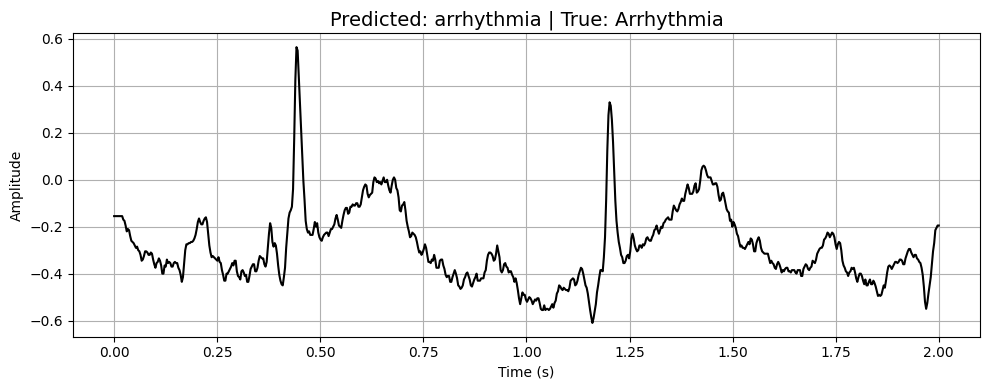

Prediction: arrhythmia


In [17]:
complete_pipeline('./user/arrhy','228',true_label='Arrhythmia')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


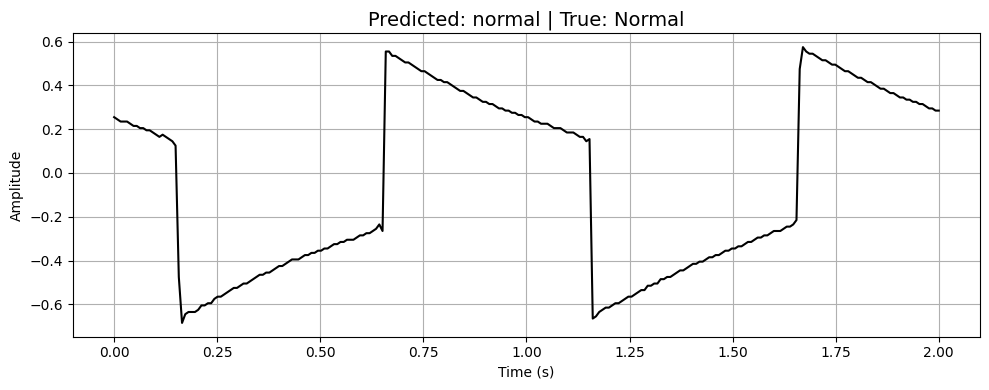

Prediction: normal


In [18]:
complete_pipeline('./user/normal','19140',true_label='Normal')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


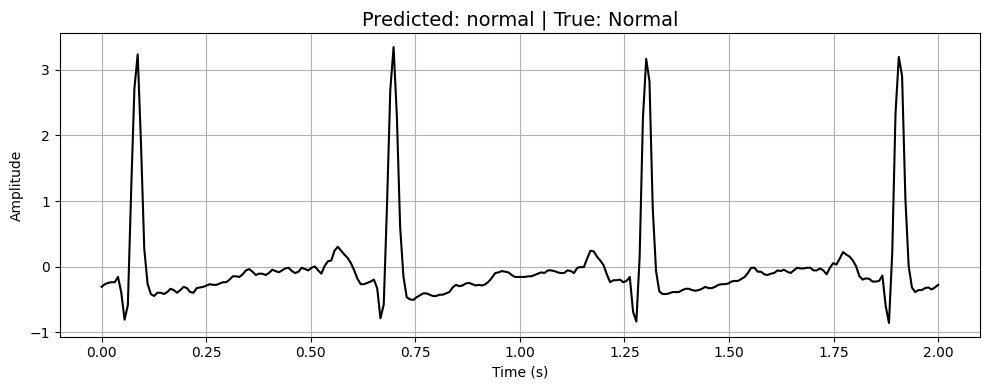

Prediction: normal


In [19]:
complete_pipeline('./user/normal','16273',true_label='Normal')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


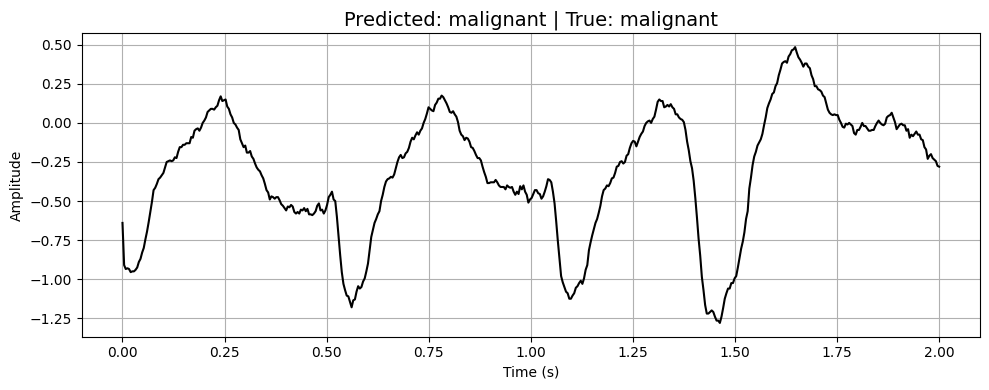

Prediction: malignant


In [20]:
complete_pipeline('./user/malignant/','418',true_label='malignant')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


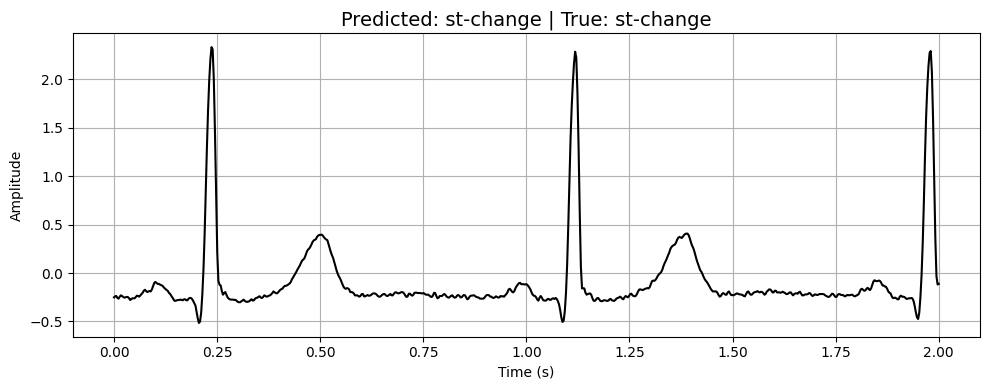

Prediction: st-change


In [21]:
complete_pipeline('./user/st/','313',true_label='st-change')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


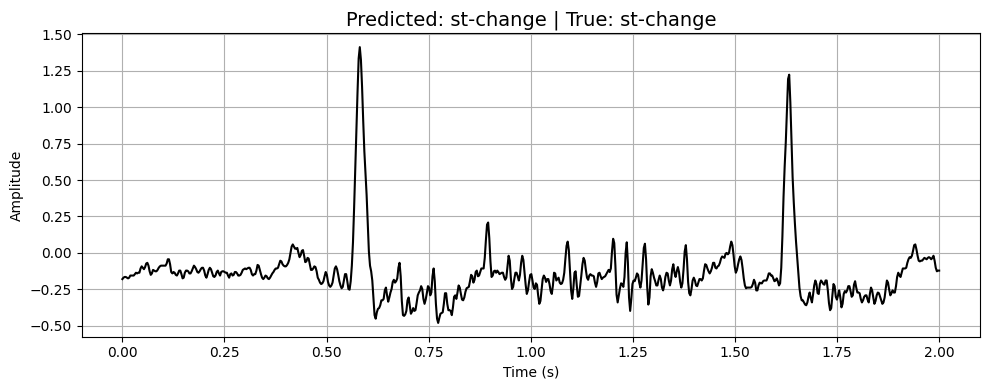

Prediction: st-change


In [22]:
complete_pipeline('./user/st/','314',true_label='st-change')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


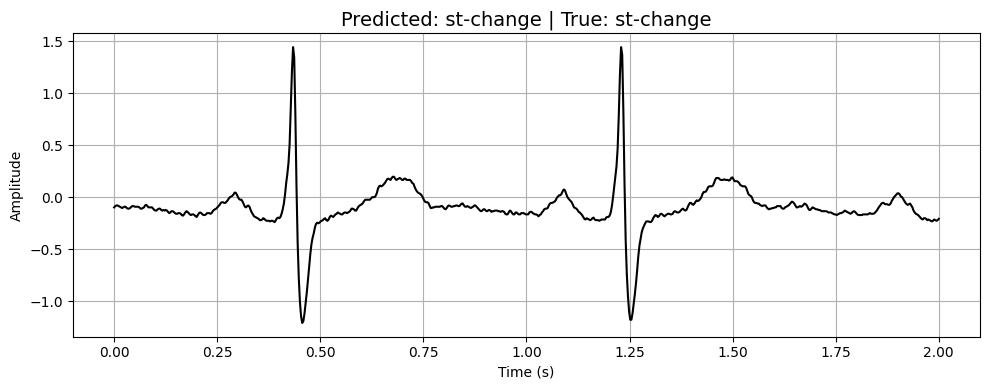

Prediction: st-change


In [23]:
complete_pipeline('./user/st/','321',true_label='st-change')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


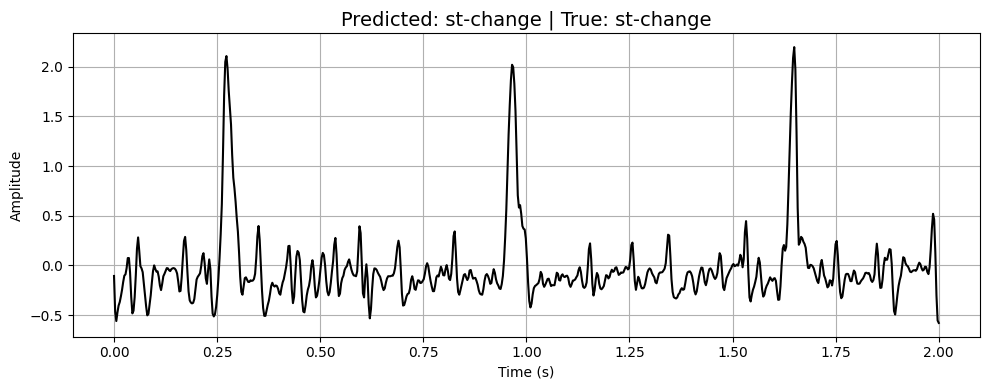

Prediction: st-change


In [24]:
complete_pipeline('./user/st/','322',true_label='st-change')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


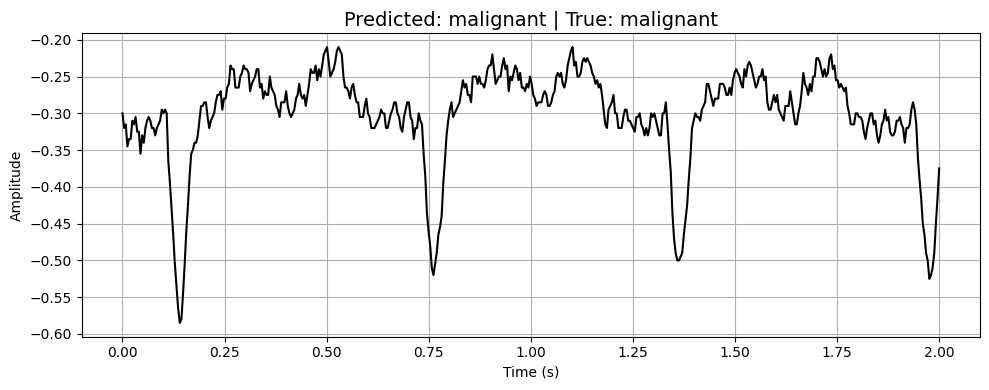

Prediction: malignant


In [25]:
complete_pipeline('./user/malignant/','429',true_label='malignant')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


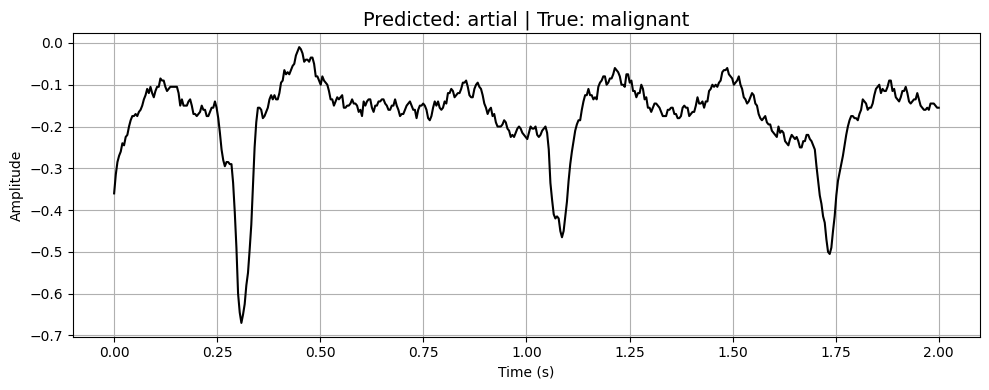

Prediction: artial


In [26]:
complete_pipeline('./user/malignant/','430',true_label='malignant')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


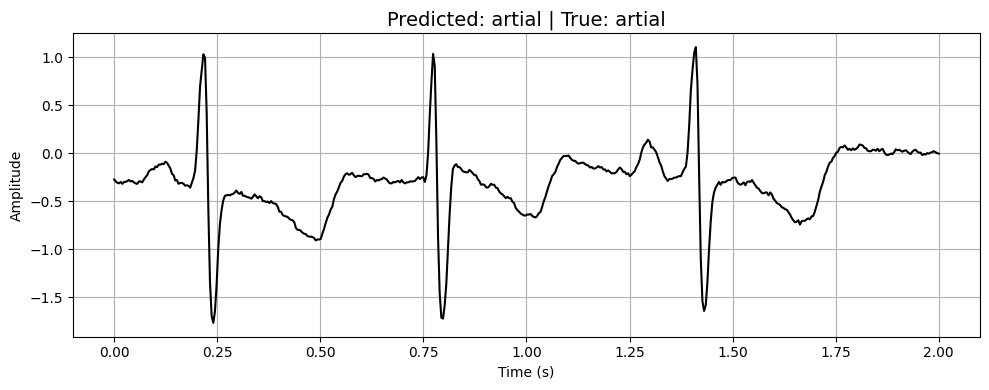

Prediction: artial


In [27]:
complete_pipeline('./user/artial/','04015',true_label='artial')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


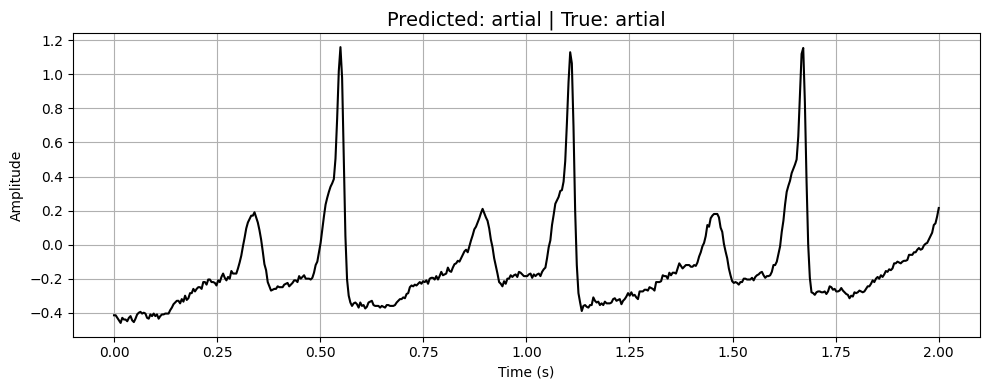

Prediction: artial


In [28]:
complete_pipeline('./user/artial/','04043',true_label='artial')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


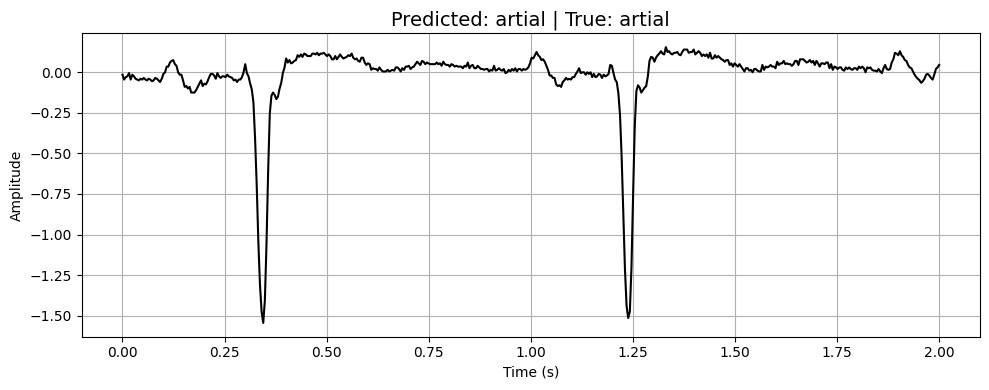

Prediction: artial


In [29]:
complete_pipeline('./user/artial/','04936',true_label='artial')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


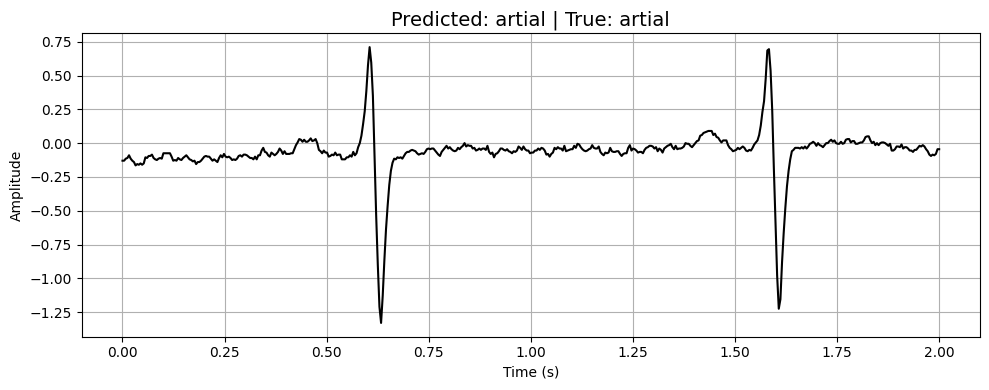

Prediction: artial


In [30]:
complete_pipeline('./user/artial/','05091',true_label='artial')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


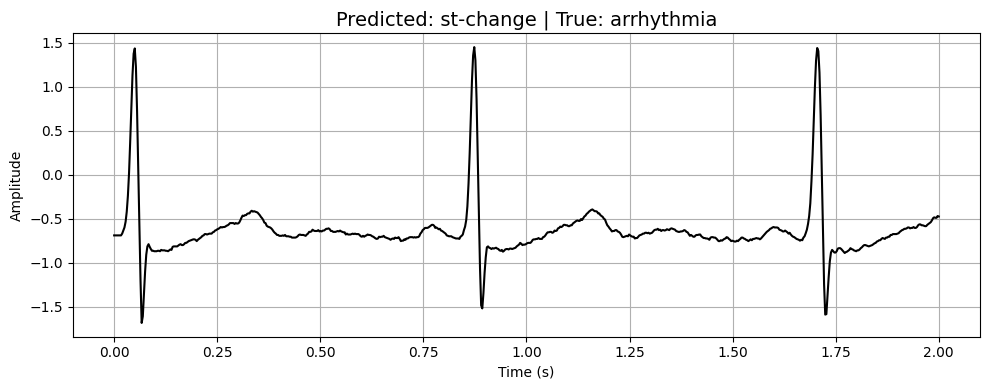

Prediction: st-change


In [31]:
complete_pipeline('./user/arrhy/','220',true_label='arrhythmia')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


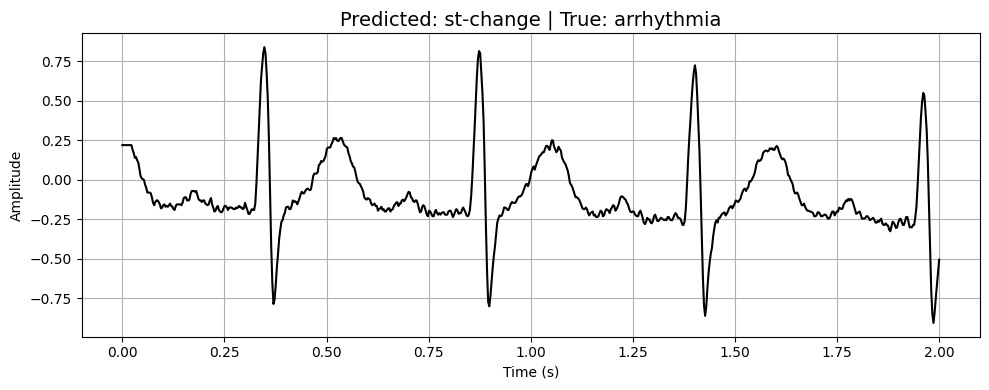

Prediction: st-change


In [32]:
complete_pipeline('./user/arrhy/','215',true_label='arrhythmia')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


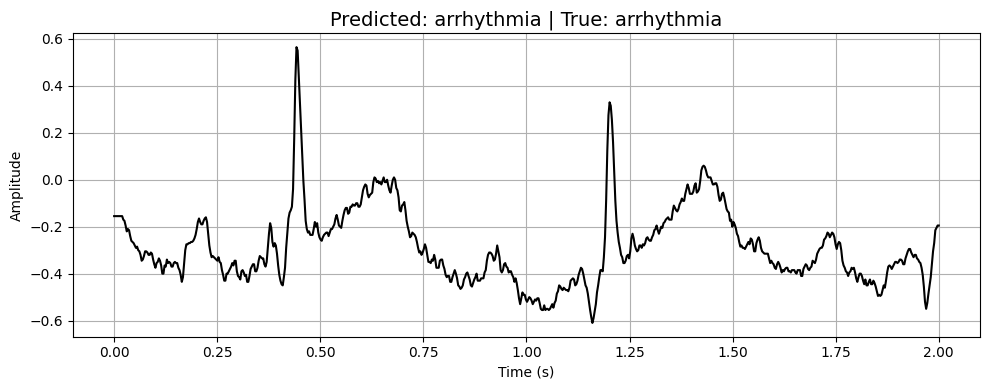

Prediction: arrhythmia


In [33]:
complete_pipeline('./user/arrhy/','228',true_label='arrhythmia')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


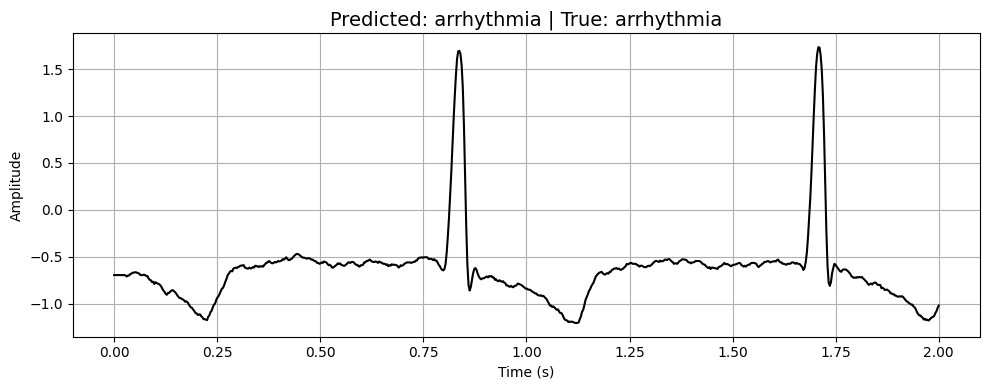

Prediction: arrhythmia


In [34]:
complete_pipeline('./user/arrhy/','219',true_label='arrhythmia')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


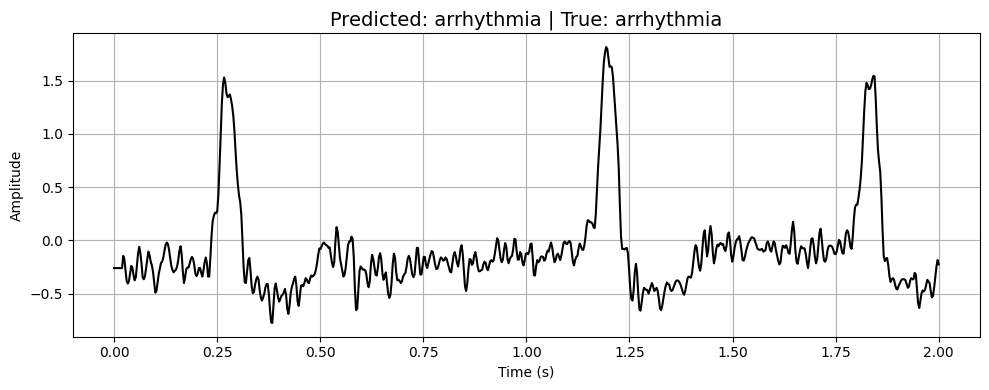

Prediction: arrhythmia


In [35]:
complete_pipeline('./user/arrhy/','203',true_label='arrhythmia')